Contents

## 1. Importing Libraries and Adjusting Settings

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Defining path

path = r'C:\Users\Lex\OneDrive\Data Analytics\Data Immersion - Advanced Analytics\Metropolitan Housing Analysis\Data'

In [3]:
# Importing state dataframe

dfstate = pd.read_csv(os.path.join(path, 'Master v8 State Subset.csv'))

In [68]:
# Importing metro dataframe

dfmetro = pd.read_csv(os.path.join(path, 'Master v8 Metro Subset.csv'))

In [5]:
# Ensuring all columns are always shown

pd.options.display.max_columns = None

In [6]:
# Ensuring all graphs are displayed without the need to call them

%matplotlib inline

In [7]:
# Ensuring high decimal precision

pd.set_option('precision', 10)

## 2. Variable Derivation

##### Population Density

In [69]:
dfmetro.columns

Index(['Year', 'City (Zillow)', 'Area', 'CBSA', 'Type', 'Key',
       'Unprotected Acreage', '% 0 Car Households', '% 1 Car Households',
       '% 2+ Car Households', 'Residential Density', 'Population Density',
       'Employment Density', 'Walkability Index W.AVG',
       'Max Walkability Index', 'Transit Access W.AVG',
       'Annual SF Home Appreciation (HPI)',
       'SF Home Metropolitan Average Value',
       'Annual SF Home Appreciation (ZHVI)', 'First CBSA SF Home Value',
       'Cumulative % Change SF Home Average Value', 'Pop. Estimate Category',
       'Pop. Density Category', 'Population Estimate', 'Net Population Change',
       'Natural Population Change', 'International Migration',
       'Domestic Migration', 'Net Migration', '% Population Change',
       '% Migration Pop Change', '% Int Mig Pop Change',
       '% Dom Mig Pop Change', '% SF Building Permits',
       '% 2 Unit Building Permits', '% 3-4 Unit Building Permits',
       '% 5+ Unit Building Permits', '% Mult

In [9]:
dfmetro['Population Density'].describe()

count    10839.0000000000
mean         0.2779722371
std          0.4989598978
min          0.0000000000
25%          0.0664170810
50%          0.1430400330
75%          0.2788489975
max          6.5437033800
Name: Population Density, dtype: float64

<AxesSubplot:xlabel='Population Density', ylabel='Population Estimate'>

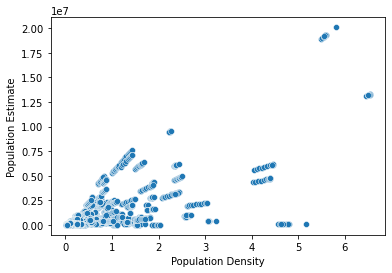

In [10]:
sns.scatterplot(x = 'Population Density', y = 'Population Estimate', data = dfmetro)

<AxesSubplot:xlabel='Population Density', ylabel='% Multi-Unit Buildings'>

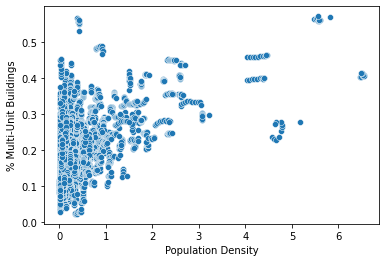

In [11]:
sns.scatterplot(x = 'Population Density', y = '% Multi-Unit Buildings', data = dfmetro)

<AxesSubplot:xlabel='Population Density', ylabel='SF Home Metropolitan Average Value'>

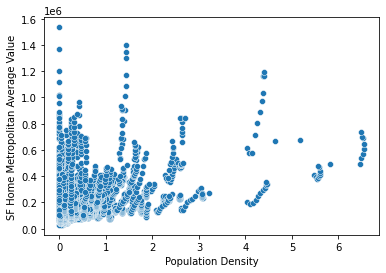

In [12]:
sns.scatterplot(x = 'Population Density', y = 'SF Home Metropolitan Average Value', data = dfmetro)

In [51]:
dfmetro.loc[dfmetro['Population Density'] > 1.5, 'Pop. Density Category'] = 'Very Dense'

In [64]:
dfmetro.loc[(dfmetro['Population Density'] <= 1.5) & (dfmetro['Population Density'] > .3), 'Pop. Density Category'] = 'Somewhat Dense'

In [65]:
dfmetro.loc[dfmetro['Population Density'] < .3, 'Pop. Density Category'] = 'Normal Density'

In [66]:
dfmetro['Pop. Density Category'].value_counts(dropna = False)

Normal Density    8317
Somewhat Dense    2212
NaN                464
Very Dense         310
Name: Pop. Density Category, dtype: int64

<AxesSubplot:>

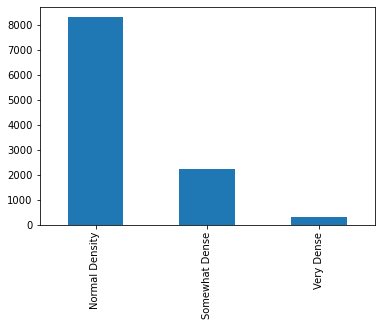

In [67]:
dfmetro['Pop. Density Category'].value_counts().plot.bar()

In [18]:
dfmetro2 = dfmetro[dfmetro['Pop. Density Category'].isnull()==False]

In [19]:
dfmetro2 = dfmetro2[dfmetro2['Population Estimate'].isnull()==False]

In [20]:
dfmetro2 = dfmetro2[dfmetro2['% Multi-Unit Buildings'].isnull()==False]

##### Population Estimate Categories

In [36]:
dfmetro['Population Estimate'].describe()

count    9.9020000000e+03
mean     3.2857667703e+05
std      1.0773442126e+06
min      1.2439000000e+04
25%      4.0338500000e+04
50%      7.5890000000e+04
75%      1.8895650000e+05
max      2.0096413000e+07
Name: Population Estimate, dtype: float64

In [56]:
# Population Estimate Categories

dfmetro.loc[dfmetro['Population Estimate'] >= 500000, 'Pop. Estimate Category'] = 'High Population'

In [57]:
dfmetro.loc[(dfmetro['Population Estimate'] < 500000) & (dfmetro['Population Estimate'] >= 50000), 'Pop. Estimate Category'] = 'Medium Population'

In [58]:
dfmetro.loc[dfmetro['Population Estimate'] < 50000, 'Pop. Estimate Category'] = 'Low Population'

<AxesSubplot:>

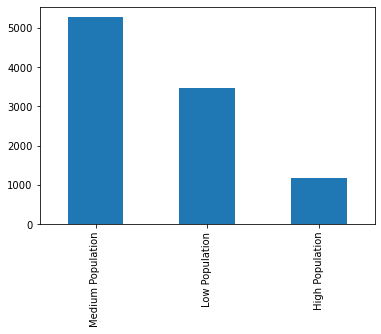

In [59]:
dfmetro['Pop. Estimate Category'].value_counts().plot.bar()

In [60]:
# Crosstab comparing Population vs. Population Density

pd.crosstab(dfmetro['Pop. Estimate Category'], dfmetro['Pop. Density Category'], dropna = True)

Pop. Density Category,Normal Density,Somewhat Dense,Very Dense
Pop. Estimate Category,,,
High Population,347,578,245
Low Population,3425,12,21
Medium Population,4740,489,44


<AxesSubplot:title={'center':'Population vs. Population Density'}, xlabel='Pop. Estimate Category'>

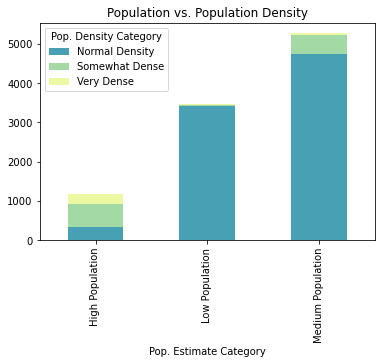

In [61]:
pd.crosstab(dfmetro['Pop. Estimate Category'], dfmetro['Pop. Density Category'], dropna = True).plot.bar(stacked = True, color = sns.color_palette("Spectral_r", 6), title= 'Population vs. Population Density')